In [ ]:
import os
import pandas as pd
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
csvPath = '/content/drive/MyDrive/Data/features_30_sec.csv'
audio_dir = '/content/drive/MyDrive/Data/genres_original'

In [ ]:
df = pd.read_csv(csvPath)
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
def extractFeatures(file):
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
  mfccs_features_scaled = np.mean(mfccs_features.T,axis=0)
  return mfccs_features_scaled

In [ ]:
df.drop(labels=552,axis=0,inplace=True)

In [ ]:
from tqdm import tqdm

features_extracted = [

]

In [ ]:
for idx, row in tqdm(df.iterrows()):
  try:
    labels = row['label']
    file_name = os.path.join(os.path.abspath(audio_dir),labels+'/',str(row['filename']))
    data = extractFeatures(file_name)
    features_extracted.append([data, labels])
  except Exception as e:
    print(f"----->found error {e}")
    continue

553it [05:39,  1.71it/s]<ipython-input-6-ea0812c28454>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
554it [05:40,  1.44it/s]

----->found error 


999it [09:55,  1.68it/s]


In [ ]:
features_extracted_df = pd.DataFrame(features_extracted,columns=['features','genre'])

In [ ]:
features_extracted_df['genre'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          98
Name: genre, dtype: int64

In [ ]:
X = np.array(features_extracted_df['features'].tolist())
y = np.array(features_extracted_df['genre'].tolist())

In [ ]:
X.shape

(998, 40)

In [ ]:
y.shape

(998,)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
labenc = LabelEncoder()
y = to_categorical(labenc.fit_transform(y))

In [ ]:
y.shape

(998, 10)

In [ ]:
#### TRAIN TEST SPLITTING
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
X_train.shape

(698, 40)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels = y.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(1024,input_shape=(40,), activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(num_labels,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1024)              41984     
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 128)              

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train, batch_size=10,epochs=200,validation_data=(X_train,y_train),verbose=1)

Epoch 1/200
70/70 [==============================] - 3s 15ms/step - loss: 2.3827 - accuracy: 0.1003 - val_loss: 2.2922 - val_accuracy: 0.1117
Epoch 2/200
70/70 [==============================] - 1s 13ms/step - loss: 2.3174 - accuracy: 0.1347 - val_loss: 2.2150 - val_accuracy: 0.2249
Epoch 3/200
70/70 [==============================] - 1s 15ms/step - loss: 2.2407 - accuracy: 0.1777 - val_loss: 2.1223 - val_accuracy: 0.2679
Epoch 4/200
70/70 [==============================] - 1s 12ms/step - loss: 2.1570 - accuracy: 0.2163 - val_loss: 2.0283 - val_accuracy: 0.2564
Epoch 5/200
70/70 [==============================] - 1s 12ms/step - loss: 2.0653 - accuracy: 0.2235 - val_loss: 1.9685 - val_accuracy: 0.3052
Epoch 6/200
70/70 [==============================] - 1s 15ms/step - loss: 2.0568 - accuracy: 0.2206 - val_loss: 1.9737 - val_accuracy: 0.2908
Epoch 7/200
70/70 [==============================] - 1s 12ms/step - loss: 1.9870 - accuracy: 0.2407 - val_loss: 1.8946 - val_accuracy: 0.3080
Epoch 

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

[2.2722198963165283, 0.5933333039283752]

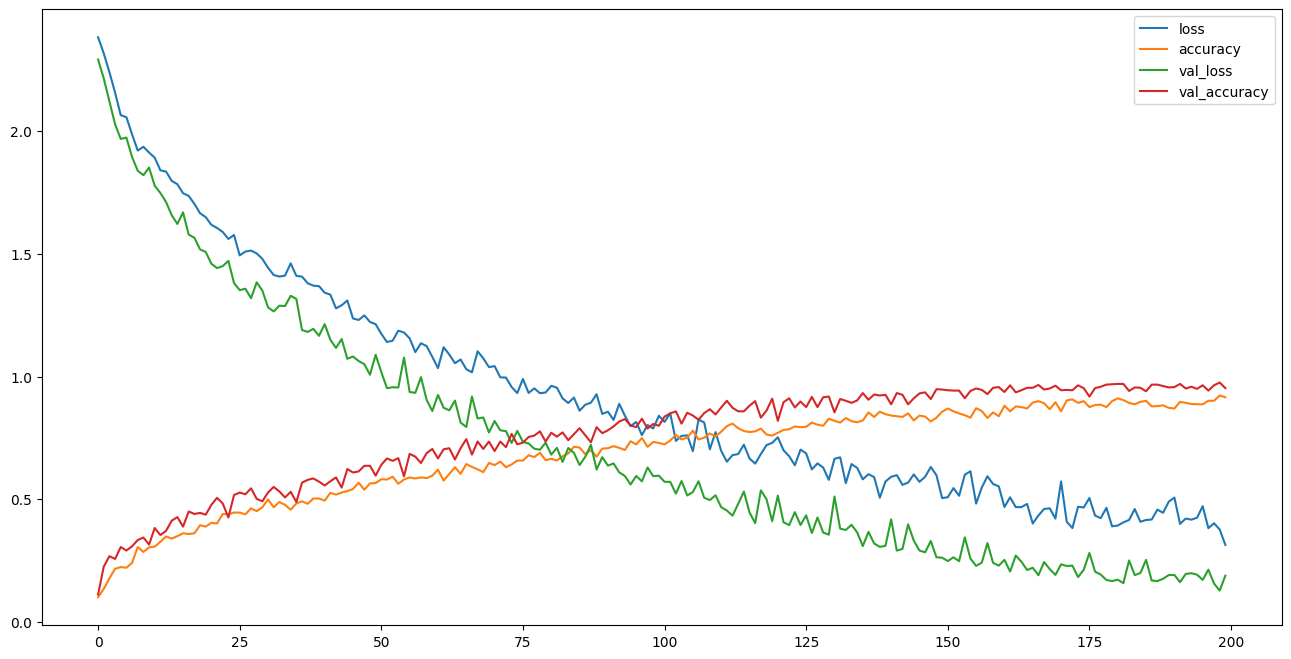

In [ ]:
pd.DataFrame(history.history).plot(figsize=(16,8))
plt.show()